In [1]:
import numpy as np
from skimage import io
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_grid(imgs, titles, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # Cria um grid para as imgs
    for a, i, t in zip(axs.flatten(), imgs, titles):
        # Adiciona uma imagem (i) na posição correta (a):
        a.imshow(i, cmap='gray', aspect='equal', interpolation=None, vmin=0, vmax=255)
        a.set_title(t)
    # Desativa o eixo das imagens (separado pois o número de imgs pode não preencher o grid):
    for a in axs.flatten(): a.set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axs

In [3]:
h1 = np.array([
[0,   0, -1,  0,  0],
[0,  -1, -2, -1,  0],
[-1, -2, 16, -2, -1],
[0,  -1, -2, -1,  0],
[0,   0, -1,  0,  0]
])
h2 = np.array([
[1,  4,  6,  4, 1],
[4, 16, 24, 16, 4],
[6, 24, 36, 24, 6],
[4, 16, 24, 16, 4],
[1,  4,  6,  4, 1]
]) / 256
h3 = np.array([
[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]
])
h4 = h3.T
h5 = np.array([
[-1, -1, -1],
[-1,  8, -1],
[-1, -1, -1]
])
h6 = np.ones((3, 3)) / 9
h7 = np.array([
[-1, -1,  2],
[-1,  2, -1],
[2,  -1, -1]
])
h8 = np.array([
[2,  -1, -1],
[-1,  2, -1],
[-1, -1,  2]
])
h9 = np.identity(9) / 9
h10 = np.array([
[-1, -1, -1, -1, -1],
[-1,  2,  2,  2, -1],
[-1,  2,  8,  2, -1],
[-1,  2,  2,  2, -1],
[-1, -1, -1, -1, -1]
]) / 8
h11 = np.array([
[-1, -1, 0],
[-1,  0, 1],
[0,   1, 1]
])

In [4]:
from skimage.util import img_as_ubyte
# poly = 255 * io.imread('./poly.png', as_gray=True)  # convert to [0-255]
poly = img_as_ubyte(io.imread('./poly.png', as_gray=True)).astype(float)
city = io.imread('./city.png', as_gray=True)
house = io.imread('./house.png', as_gray=True)
baboon = io.imread('./baboon.png', as_gray=True)
seagull = io.imread('./seagull.png', as_gray=True)
butterfly = io.imread('./butterfly.png', as_gray=True)
imgs = [poly, city, house, baboon, seagull, butterfly]

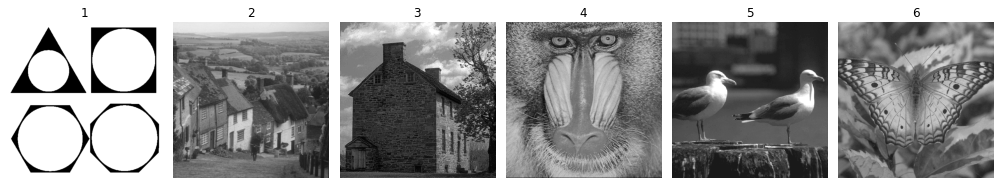

In [5]:
f1, axs1 = plot_grid(imgs, range(1, 7), 1, 6, (14, 14))

In [6]:
def resize_range(img):
    return (255.0 / np.max(img) * img).astype(int).clip(0, 255)


def bit_plane(img, bit=7):
    return (img.astype(int) & (1 << bit)) >> bit

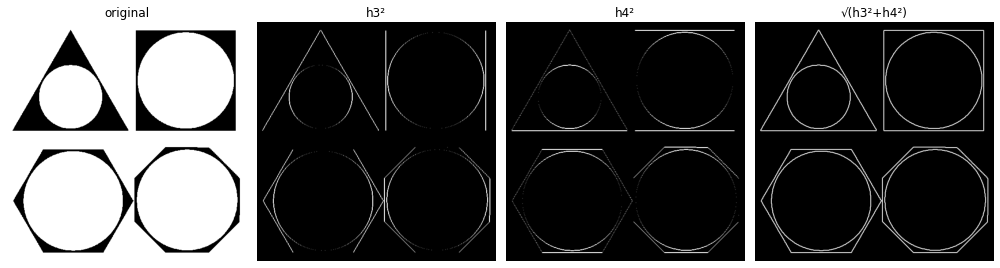

In [7]:
orig = poly
h32 = ndimage.convolve(orig, h3, mode='nearest') ** 2
h42 = ndimage.convolve(orig, h4, mode='nearest') ** 2
r = np.sqrt(h32 + h42)

h32 = resize_range(h32)
h42 = resize_range(h42)
r = resize_range(r)
f1, axs1 = plot_grid([orig, h32, h42, r], ['original', 'h3²', 'h4²', '√(h3²+h4²)'], 1, 4, (14, 14))